library


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns



Upload Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving study_performance.csv to study_performance.csv


Load Data

In [ ]:
file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name)

Check for Missing Values

In [ ]:
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64


Visualize Missing Values

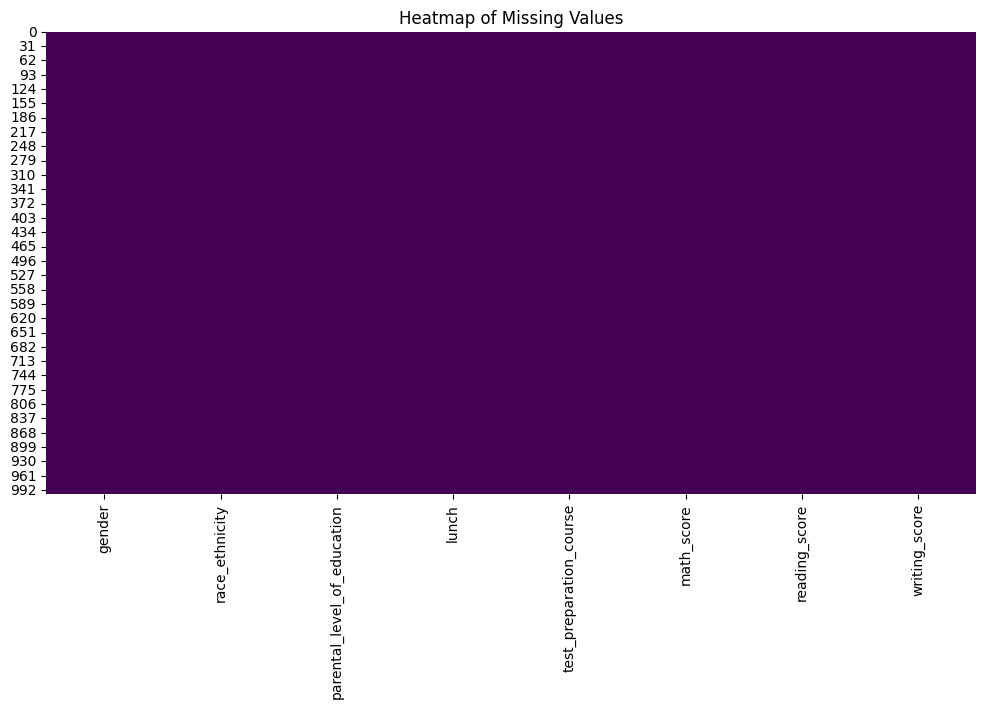

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

Print the percentage of missing values in each column

In [ ]:
missing_percentage = (missing_values / len(data)) * 100
print("\nPercentage of missing values in each column:\n", missing_percentage)



Percentage of missing values in each column:
 gender                         0.0
race_ethnicity                 0.0
parental_level_of_education    0.0
lunch                          0.0
test_preparation_course        0.0
math_score                     0.0
reading_score                  0.0
writing_score                  0.0
dtype: float64


 Remove 'race_ethnicity' feature

In [ ]:
data = data.drop(columns=['race_ethnicity'])

In [ ]:
print(data.head())

   gender parental_level_of_education         lunch test_preparation_course  \
0  female           bachelor's degree      standard                    none   
1  female                some college      standard               completed   
2  female             master's degree      standard                    none   
3    male          associate's degree  free/reduced                    none   
4    male                some college      standard                    none   

   math_score  reading_score  writing_score  
0          72             72             74  
1          69             90             88  
2          90             95             93  
3          47             57             44  
4          76             78             75  


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   parental_level_of_education  1000 non-null   object
 2   lunch                        1000 non-null   object
 3   test_preparation_course      1000 non-null   object
 4   math_score                   1000 non-null   int64 
 5   reading_score                1000 non-null   int64 
 6   writing_score                1000 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 54.8+ KB
None


Encode Categorical Variables

In [ ]:
data_encoded = pd.get_dummies(data, drop_first=True)

 Split Data into Features (X) and Target (y)

In [ ]:
X = data_encoded.drop('math_score', axis=1)
y = data_encoded['math_score']


Split Data into Training, Validation, and Testing Sets

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42)


Train Decision Tree Model

In [ ]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_val_predictions = dt_model.predict(X_val)

Evaluate Decision Tree Model on Validation Set

In [ ]:
dt_r2 = r2_score(y_val, dt_val_predictions)
dt_r2_percentage = dt_r2 * 100
dt_mae = mean_absolute_error(y_val, dt_val_predictions)

print(f"Decision Tree Validation Set - R² Score: {dt_r2_percentage:.2f}%")
print(f"Decision Tree Validation Set - Mean Absolute Error: {dt_mae:.2f}")

Decision Tree Validation Set - R² Score: 74.64%
Decision Tree Validation Set - Mean Absolute Error: 6.66


 Test Decision Tree Model on Test Set

In [ ]:
dt_test_predictions = dt_model.predict(X_test)
dt_test_r2 = r2_score(y_test, dt_test_predictions)
dt_test_mae = mean_absolute_error(y_test, dt_test_predictions)

print(f"Decision Tree Test Set - R² Score: {dt_test_r2:.2f}%")
print(f"Decision Tree Test Set - Mean Absolute Error: {dt_test_mae:.2f}")

Decision Tree Test Set - R² Score: 0.64%
Decision Tree Test Set - Mean Absolute Error: 6.59


Visualize the Results for Decision Tree

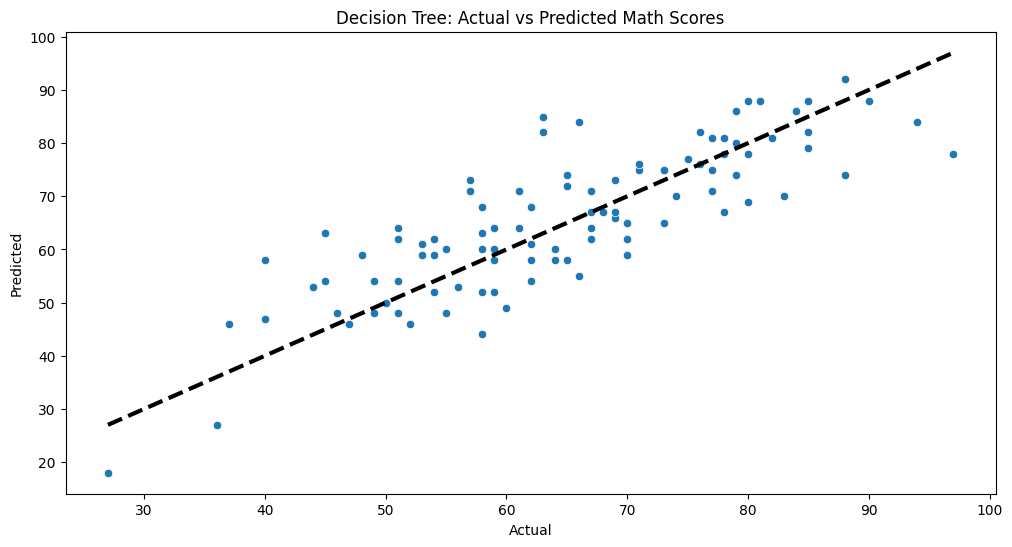

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=dt_test_predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree: Actual vs Predicted Math Scores')
plt.show()

Residual analysis for Decision Tree

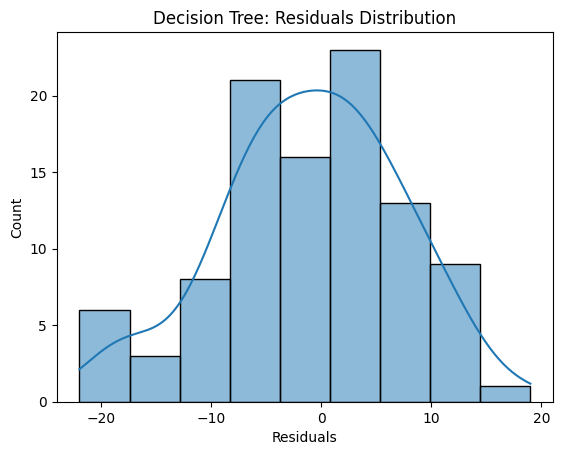

In [ ]:
residuals_dt = y_test - dt_test_predictions
sns.histplot(residuals_dt, kde=True)
plt.xlabel('Residuals')
plt.title('Decision Tree: Residuals Distribution')
plt.show()